# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [36]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [124]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
max_temp= []
humidity_list = []
clouds_list = []
wind_speed_list = []
city_date =[]

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        

        # Append the City information into city_data list
        
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guerrero negro
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | metlili chaamba
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | prince rupert
Processing Record 9 of Set 1 | san antonio de pale
Processing Record 10 of Set 1 | aasiaat
Processing Record 11 of Set 1 | mount pearl
Processing Record 12 of Set 1 | douentza
Processing Record 13 of Set 1 | uturoa
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | portland
Processing Record 16 of Set 1 | atafu village
Processing Record 17 of Set 1 | puerto san jose
Processing Record 18 of Set 1 | enewetak
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | rio gallegos
Pr

In [133]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [134]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,guerrero negro,27.9769,-114.0611,16.16,72,100,7.13,MX,1709783774
1,avarua,-21.2078,-159.7750,29.03,79,20,5.66,CK,1709783774
2,grytviken,-54.2811,-36.5092,5.42,61,66,0.86,GS,1709783774
3,college,64.8569,-147.8028,-3.82,51,75,4.12,US,1709783775
4,metlili chaamba,32.2667,3.6333,12.52,44,0,1.03,DZ,1709783775


In [68]:
# Export the City_Data into a csv

city_data_df.to_csv("/Users/lauren-ashleyrutland/Desktop/API-Challenge/output_data/cities.csv", index_label="City_ID")

In [69]:
# Read saved data
city_data_df = pd.read_csv("/Users/lauren-ashleyrutland/Desktop/API-Challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guerrero negro,27.9769,-114.0611,18.40,57,100,8.75,MX,1709754328
1,avarua,-21.2078,-159.7750,28.03,78,40,6.17,CK,1709754329
2,grytviken,-54.2811,-36.5092,7.08,57,100,1.06,GS,1709754329
3,college,64.8569,-147.8028,-6.63,71,75,2.57,US,1709753747
4,metlili chaamba,32.2667,3.6333,17.52,32,0,2.57,DZ,1709754330


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

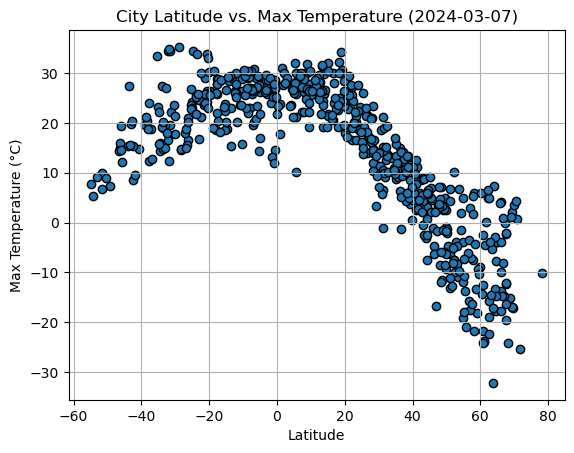

In [178]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/lauren-ashleyrutland/Desktop/API-Challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

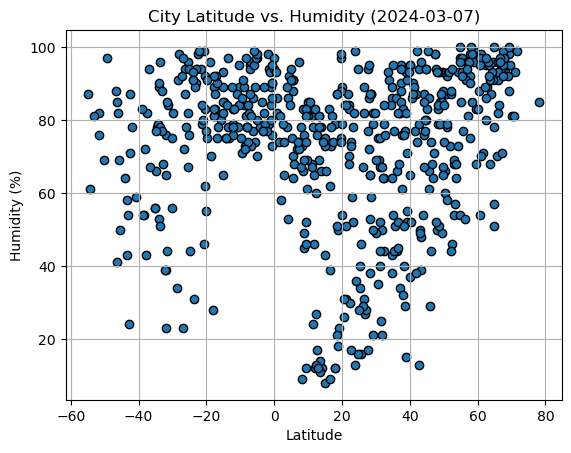

In [177]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/lauren-ashleyrutland/Desktop/API-Challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

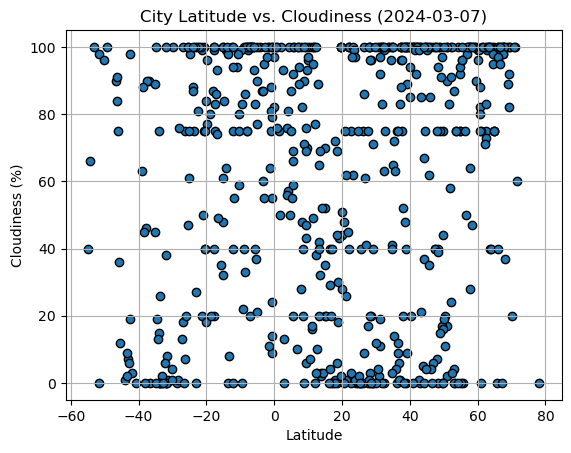

In [176]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")


# Incorporate the other graph properties

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("/Users/lauren-ashleyrutland/Desktop/API-Challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

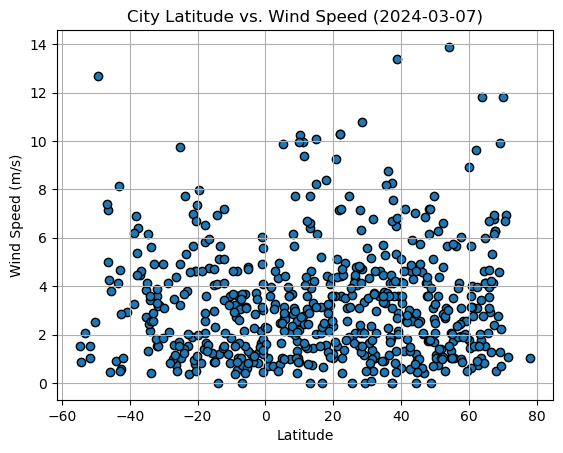

In [175]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/lauren-ashleyrutland/Desktop/API-Challenge/output_data/Fig4.png")


# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [179]:
# Define a function to create Linear Regression plots

def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [180]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"])>=0, :]


# Display sample data
                                
northern_hemi_df.head()
                              

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,guerrero negro,27.9769,-114.0611,16.16,72,100,7.13,MX,1709783774
3,college,64.8569,-147.8028,-3.82,51,75,4.12,US,1709783775
4,metlili chaamba,32.2667,3.6333,12.52,44,0,1.03,DZ,1709783775
5,bilibino,68.0546,166.4372,-24.09,94,37,0.48,RU,1709783776
6,prince rupert,54.3161,-130.3201,1.83,93,100,13.89,CA,1709783710


In [200]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"])<0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,avarua,-21.2078,-159.7750,29.03,79,20,5.66,CK,1709783774
2,grytviken,-54.2811,-36.5092,5.42,61,66,0.86,GS,1709783774
7,san antonio de pale,-1.4014,5.6325,28.28,79,100,1.64,GQ,1709783777
11,uturoa,-16.7333,-151.4333,28.43,75,93,4.76,PF,1709783778
12,adamstown,-25.0660,-130.1015,24.12,76,61,4.91,PN,1709783778


###  Temperature vs. Latitude Linear Regression Plot

The r-value for Northern Hemisphere is: -0.897743571201823


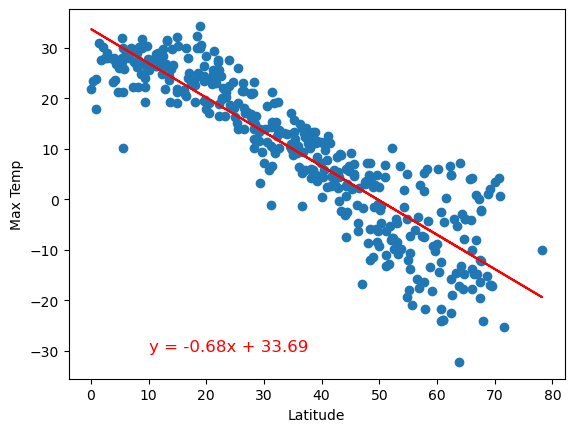

In [184]:
# Linear regression on Northern Hemisphere

# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Max Temp"]
(slope_northern, intercept_northern, rvalue_northern, pvalue_northern, stderr_northern) = linregress(x_values_northern, y_values_northern)
regress_values_northern = x_values_northern * slope_northern + intercept_northern
line_eq_northern = "y = " + str(round(slope_northern,2)) + "x + " + str(round(intercept_northern,2))

# Plot Northern Hemisphere
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values_northern, "r-")
plt.annotate(line_eq_northern,(10,-30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value for Northern Hemisphere is: {rvalue_northern}")
plt.show()


The r-value for Southern Hemisphere is: 0.5585493379359663


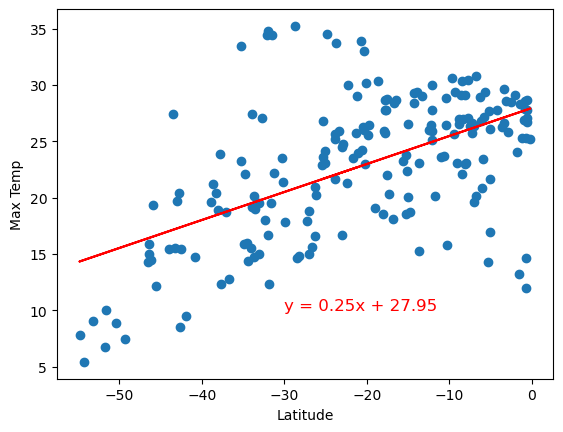

In [211]:
# Linear regression on Southern Hemisphere
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]
(slope_southern, intercept_southern, rvalue_southern, pvalue_southern, stderr_southern) = linregress(x_values_southern, y_values_southern)
regress_values_southern = x_values_southern * slope_southern + intercept_southern
line_eq_southern = "y = " + str(round(slope_southern,2)) + "x + " + str(round(intercept_southern,2))

# Plot Southern Hemisphere
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-")
plt.annotate(line_eq_southern,(-30,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value for Southern Hemisphere is: {rvalue_southern}")
plt.show()

Discussion abocut the linear relationship:T he nothern hemisphere is displaying a negative correlation while the southern hemisphere is displaying a positive correlation. The northern hemisphere is negative showing that the variables are moving in the opposite direction, as the latitude is increasing the max temp is decreasing. The southern hemisphere is displaying a positive r-value indicating that the variables are moving in the same direction meanining that as the latitude increases so is the max temp. 


### Humidity vs. Latitude Linear Regression Plot

The r-value for Northern Hemisphere is: 0.34716029086213823


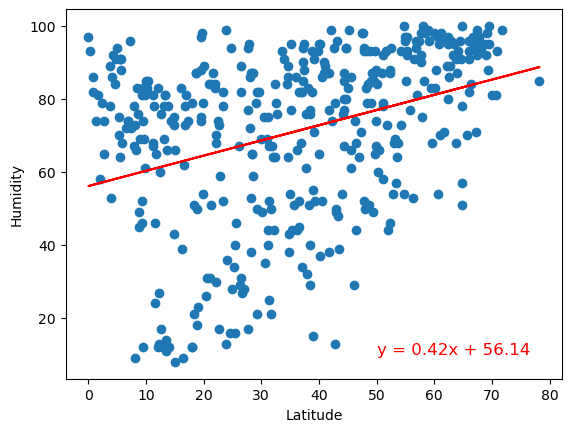

In [189]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Humidity"]
(slope_northern, intercept_northern, rvalue_northern, pvalue_northern, stderr_northern) = linregress(x_values_northern, y_values_northern)
regress_values_northern = x_values_northern * slope_northern + intercept_northern
line_eq_northern = "y = " + str(round(slope_northern,2)) + "x + " + str(round(intercept_northern,2))

# Plot Northern Hemisphere
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values_northern, "r-")
plt.annotate(line_eq_northern,(50,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value for Northern Hemisphere is: {rvalue_northern}")
plt.show()


The r-value for Southern Hemisphere is: 0.37044072905223413


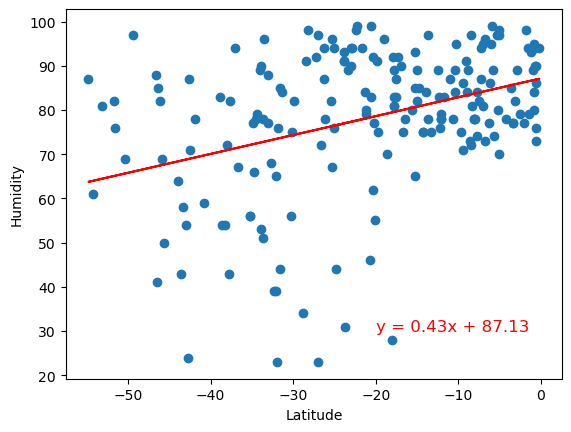

In [206]:
# Southern Hemisphere
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Humidity"]
(slope_southern, intercept_southern, rvalue_southern, pvalue_southern, stderr_southern) = linregress(x_values_southern, y_values_southern)
regress_values_southern = x_values_southern * slope_southern + intercept_southern
line_eq_southern = "y = " + str(round(slope_southern,2)) + "x + " + str(round(intercept_southern,2))

# Plot Southern Hemisphere
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-")
plt.annotate(line_eq_southern,(-20,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value for Southern Hemisphere is: {rvalue_southern}")
plt.show()

Discussion about the linear relationship:In this scenario both correlations would be considered positive but due to the r-value they would be classified as weak. Both plots indicate that temperatures increase as the latitude increases but on a smaller margin compared to the charts showing max temp. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value for Northern Hemisphere is: 0.20143626100307618


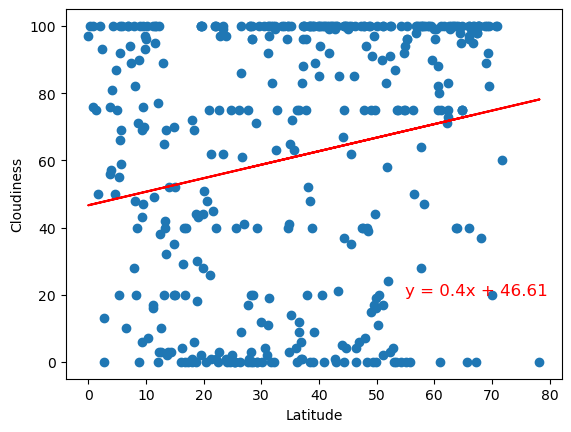

In [207]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Cloudiness"]
(slope_northern, intercept_northern, rvalue_northern, pvalue_northern, stderr_northern) = linregress(x_values_northern, y_values_northern)
regress_values_northern = x_values_northern * slope_northern + intercept_northern
line_eq_northern = "y = " + str(round(slope_northern,2)) + "x + " + str(round(intercept_northern,2))

# Plot Northern Hemisphere
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values_northern, "r-")
plt.annotate(line_eq_northern,(55,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value for Northern Hemisphere is: {rvalue_northern}")
plt.show()


The r-value for Southern Hemisphere is: 0.3325821967523688


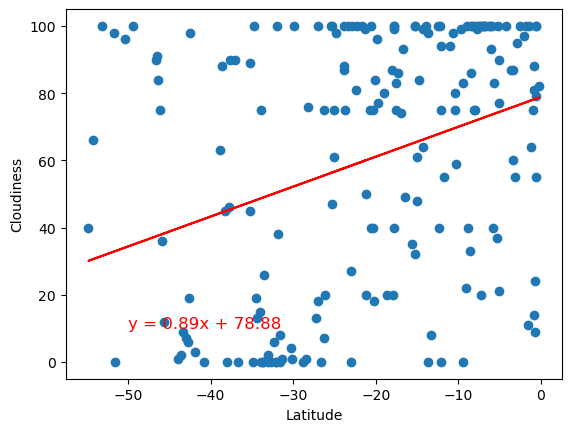

In [203]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Cloudiness"]
(slope_southern, intercept_southern, rvalue_southern, pvalue_southern, stderr_southern) = linregress(x_values_southern, y_values_southern)
regress_values_southern = x_values_southern * slope_southern + intercept_southern
line_eq_southern = "y = " + str(round(slope_southern,2)) + "x + " + str(round(intercept_southern,2))

# Plot Southern Hemisphere
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-")
plt.annotate(line_eq_southern,(-50,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value for Southern Hemisphere is: {rvalue_southern}")
plt.show()

Discussion about the linear relationship: Both scatter plots here are displaying positive correlations. This is saying that in both the northern and southern hemisphere cloudiness and latitude have a direct relation to each other. Cloudiness increases in both hemispheres at the latitude increases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value for Northern Hemisphere is: 0.019426054672800418


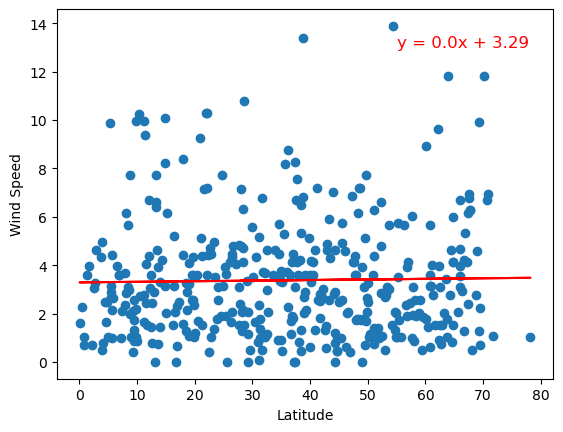

In [210]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Wind Speed"]
(slope_northern, intercept_northern, rvalue_northern, pvalue_northern, stderr_northern) = linregress(x_values_northern, y_values_northern)
regress_values_northern = x_values_northern * slope_northern + intercept_northern
line_eq_northern = "y = " + str(round(slope_northern,2)) + "x + " + str(round(intercept_northern,2))

# Plot Northern Hemisphere
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values_northern, "r-")
plt.annotate(line_eq_northern,(55,13),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value for Northern Hemisphere is: {rvalue_northern}")
plt.show()


The r-value for Southern Hemisphere is: -0.17967850177380848


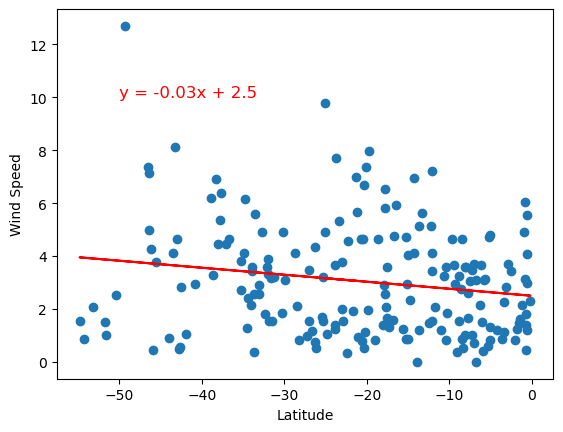

In [204]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Wind Speed"]
(slope_southern, intercept_southern, rvalue_southern, pvalue_southern, stderr_southern) = linregress(x_values_southern, y_values_southern)
regress_values_southern = x_values_southern * slope_southern + intercept_southern
line_eq_southern = "y = " + str(round(slope_southern,2)) + "x + " + str(round(intercept_southern,2))

# Plot Southern Hemisphere
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-")
plt.annotate(line_eq_southern,(-50,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value for Southern Hemisphere is: {rvalue_southern}")
plt.show()

Discussion about the linear relationship: The linear relationship for wind speed in the northern hemisphere is displaying as 0 which indicares there is little to no correlation which indicates it is safe to say neither of those variables have a direct effect on each other. the southern hemisphere is showing a very weak negative correlation indicating the relationship between wind speed and latitude is very weak.